## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Look at 'EIN' value counts 
application_df['EIN'].value_counts()

10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [3]:
# Drop the non-beneficial ID column 'EIN'.
application_df = application_df.drop(columns=["EIN"])

In [4]:
# Look at 'NAME' value counts 
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [5]:
# Look at 'NAME' value counts >200
name_greater_1 = application_df['NAME'].value_counts(ascending=False).loc[lambda x : x>200]
name_greater_1

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [6]:
# Choose a cutoff value and create a list of name types to be replaced
# use the variable name `name_types_to_replace`
name_counts = application_df['NAME'].value_counts()
name_types_to_replace = list(name_counts[name_counts < 293].index)

# Replace in dataframe
for app in name_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                              29369
PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
PTA TEXAS CONGRESS                                   368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC        331
ALPHA PHI SIGMA                                      313
TOASTMASTERS INTERNATIONAL                           293
Name: NAME, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = list(application_counts[application_counts < 156].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts < 777].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
# Check the number of unique values in 'AFFILIATION' column
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of affiliations to be replaced
# use the variable name `affiliation_to_replace`
affiliation_counts = application_df['AFFILIATION'].value_counts()
affiliation_to_replace = list(affiliation_counts[affiliation_counts < 15705].index)

# Replace in dataframe
for cls in affiliation_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [11]:
# Check the number of unique values in 'INCOME_AMT' column
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [12]:
# Choose a cutoff value and create a list of income_amt's to be replaced
# use the variable name `income_amt_to_replace`
income_amt_counts = application_df['INCOME_AMT'].value_counts()
income_amt_to_replace = list(income_amt_counts[income_amt_counts < 3374].index)

# Replace in dataframe
for cls in income_amt_to_replace:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [13]:
# Check the number of unique values in 'USE_CASE' column
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [14]:
# Choose a cutoff value and create a list of use_case's to be replaced
# use the variable name `use_case_to_replace`
use_case_counts = application_df['USE_CASE'].value_counts()
use_case_to_replace = list(use_case_counts[use_case_counts < 5671].index)

# Replace in dataframe
for cls in use_case_to_replace:
    application_df['USE_CASE'] = application_df['USE_CASE'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['USE_CASE'].value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [15]:
# Generate our categorical variable lists
categorical_list = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
categorical_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
# Check the number of unique values in each column
application_df[categorical_list].nunique()

NAME                      10
APPLICATION_TYPE          10
AFFILIATION                3
CLASSIFICATION             7
USE_CASE                   3
ORGANIZATION               4
INCOME_AMT                 4
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
categorical_encoded_df = pd.DataFrame(enc.fit_transform(application_df[categorical_list]))

# Add the encoded variable names to the dataframe
categorical_encoded_df.columns = enc.get_feature_names_out(categorical_list)
categorical_encoded_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_WASHINGTON STATE UNIVERSITY,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(categorical_encoded_df,left_index=True, right_index=True)
application_df = application_df.drop(categorical_list,1)
application_df.head()

<ipython-input-18-0997609a1bee>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(categorical_list,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOASTMASTERS INTERNATIONAL,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# Drop the column 'SPECIAL_CONSIDERATIONS_N' column as values also in 'SPECIAL_CONSIDERATIONS_Y' column
application_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS_N'])
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOASTMASTERS INTERNATIONAL,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
application_df["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [21]:
application_df["SPECIAL_CONSIDERATIONS_Y"].value_counts()

0.0    34272
1.0       27
Name: SPECIAL_CONSIDERATIONS_Y, dtype: int64

In [22]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [23]:
# Split our preprocessed data into our features and target arrays
y= application_df['IS_SUCCESSFUL'].values
X= application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [25]:
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# train_labels = train_labels[:1000]
# test_labels = test_labels[:1000]

# train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
# test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

In [26]:
# checkpoint_path = "checkpoints/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 45
# hidden_nodes_layer3 = 20

funding_model = tf.keras.models.Sequential()

# First hidden layer
# Add our first Dense layer, including the input layer
funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
# funding_model.add(tf.keras.layers.Dropout(rate=0.1, seed=2))
# funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Third hidden layer
# funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
# Add the output layer that uses a probability activation function
funding_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
funding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                4050      
                                                                 
 dense_1 (Dense)             (None, 45)                4095      
                                                                 
 dense_2 (Dense)             (None, 1)                 46        
                                                                 
Total params: 8,191
Trainable params: 8,191
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
# funding_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.experimental.AdamW(
#     learning_rate = 0.01,
#     name = "AdamW"
# ), metrics=["accuracy"])
funding_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# checkpoint_path = "checkpoints/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)
 

In [30]:
# Train the model
fit_funding_model = funding_model.fit(X_train_scaled, y_train, epochs=100)

# # Train the model with the new callback
# funding_model.fit(train_images, 
#           train_labels,  
#           epochs=5,
#           validation_data=(test_images, test_labels),
#           callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5364 - accuracy: 0.7327
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5195 - accuracy: 0.7440
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5145 - accuracy: 0.7475
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5118 - accuracy: 0.7498
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5110 - accuracy: 0.7500
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5097 - accuracy: 0.7510
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.7514
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5073 - accuracy: 0.7524
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7524
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5063 - accura

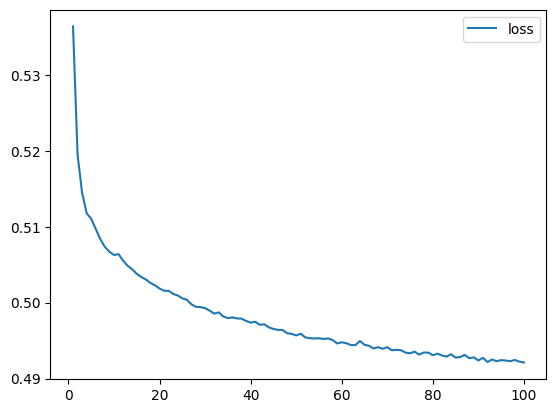

In [31]:
# Create a DataFrame containing training history
funding_model_history_df = pd.DataFrame(fit_funding_model.history)

# Increase the index by 1 to match the number of epochs
funding_model_history_df.index += 1

# Plot the loss
funding_model_history_df.plot(y="loss")
plt.show()

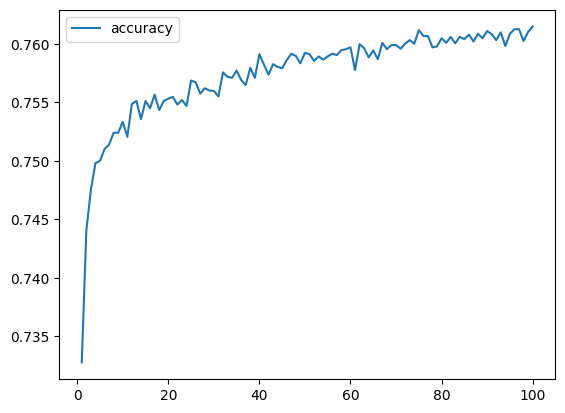

In [32]:
# Plot the accuracy
funding_model_history_df.plot(y="accuracy")
plt.show()

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = funding_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5172 - accuracy: 0.7453 - 869ms/epoch - 3ms/step
Loss: 0.517242431640625, Accuracy: 0.745306134223938


In [34]:
# Export our model to HDF5 file
funding_model.save('AlphabetSoupCharity_Optimisation.h5')